In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

In [2]:
def apply_periodic_boundary_conditions_jax(points, L):
    def distance_fn(p1, p2):
        delta = jnp.abs(p1 - p2)
        delta = jnp.minimum(delta, L - delta)
        return jnp.sqrt(jnp.sum(delta**2))

    distance_matrix = jax.vmap(
        lambda p1: jax.vmap(lambda p2: distance_fn(p1, p2))(points)
    )(points)
    
    return distance_matrix

In [3]:
N = 256
L = 1  
points = jr.uniform(jr.PRNGKey(0), (N, 2), minval=0, maxval=L)  
modified_distance_matrix = apply_periodic_boundary_conditions_jax(points, L)
print(modified_distance_matrix)


[[0.         0.62276524 0.2909565  ... 0.5842768  0.6560319  0.40586412]
 [0.62276524 0.         0.39578027 ... 0.16823366 0.11603341 0.2993094 ]
 [0.2909565  0.39578027 0.         ... 0.3333981  0.39336303 0.1776486 ]
 ...
 [0.5842768  0.16823366 0.3333981  ... 0.         0.07813165 0.17847998]
 [0.6560319  0.11603341 0.39336303 ... 0.07813165 0.         0.2520759 ]
 [0.40586412 0.2993094  0.1776486  ... 0.17847998 0.2520759  0.        ]]


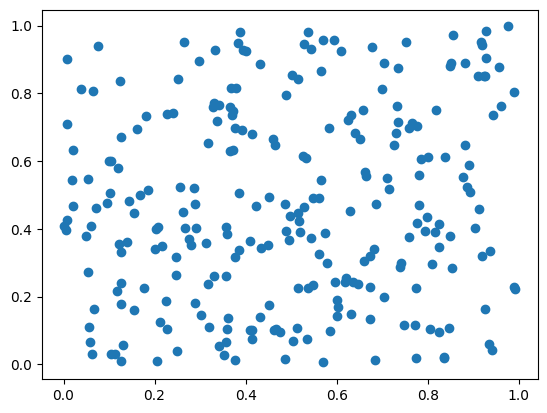

In [4]:
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [5]:
import numpy as np
dr = 0.1
rr = jnp.arange(0, L, dr)
g = np.zeros_like(rr)

In [6]:
for k in range(N):
    for j in range(k+1, N):
        r = modified_distance_matrix[k][j]
        bn = jnp.rint(r/dr)
        g[int(bn)] += 2

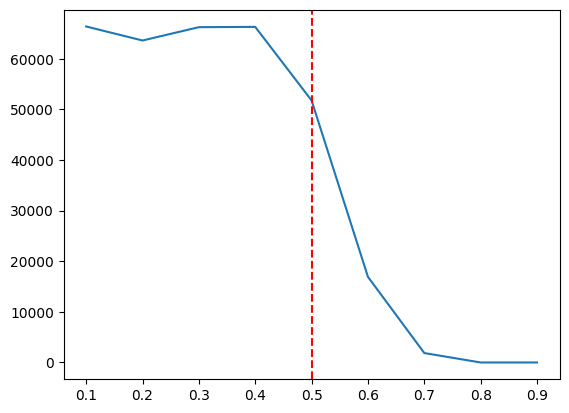

In [10]:
plt.plot(rr, g/(2*np.pi*rr*dr))
plt.axvline(L/2, linestyle="--", color="red")
plt.show()